In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

In [2]:
int_results = pd.read_csv('data/fifa/international_results.csv')
int_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
int_results['home_win'] = (int_results.home_score - int_results.away_score > 0).astype(int)
int_results.loc[int_results['home_score'] == int_results['away_score'], 'home_win'] = 2

In [4]:
int_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,2
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,2
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1


In [5]:
winners = []
for i, winner in enumerate(int_results.home_win):
    if winner == 1:
        winners.append(int_results.loc[i, 'home_team'])
    elif winner == 0:
        winners.append(int_results.loc[i, 'away_team'])
    else:
        winners.append('Tie')
int_results['Winner'] = winners
int_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,Winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,2,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,2,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1,Scotland


In [6]:
earliest_date = '2010-01-01'
int_results_after = int_results[(int_results['date'] > '2014-01-01') & (int_results['date'] < '2018-06-14')].copy()
int_results_after['date'] = pd.to_datetime(int_results_after['date'])
int_results_after = int_results_after.reset_index(drop = True)
int_results_after.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,Winner
0,2014-01-04,Bahrain,Jordan,0,1,WAFF Championship,Doha,Qatar,True,0,Jordan
1,2014-01-04,Namibia,Ghana,0,1,Friendly,Windhoek,Namibia,False,0,Ghana
2,2014-01-04,Nigeria,Ethiopia,2,1,Friendly,Abuja,Nigeria,False,1,Nigeria
3,2014-01-04,Qatar,Kuwait,3,0,WAFF Championship,Doha,Qatar,False,1,Qatar
4,2014-01-07,Bahrain,Kuwait,0,0,WAFF Championship,Doha,Qatar,True,2,Tie


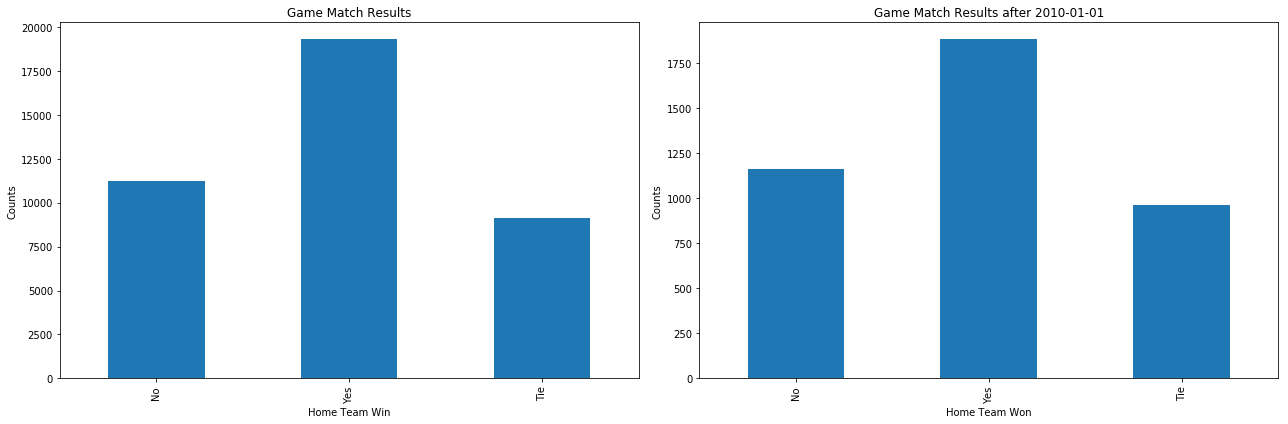

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))
int_results.groupby(['home_win']).count()['home_score'].plot(kind='bar', ax = ax1)
int_results_after.groupby(['home_win']).count()['home_score'].plot(kind='bar', ax = ax2)
plt.sca(ax1)
plt.ylabel('Counts')
locs, labels = plt.xticks()
plt.xticks(locs, ('No', 'Yes', 'Tie'))
plt.title('Game Match Results')
plt.xlabel('Home Team Win')
plt.sca(ax2)
plt.ylabel('Counts')
locs, labels = plt.xticks()
plt.xticks(locs, ('No', 'Yes', 'Tie'))
plt.title('Game Match Results after {}'.format(earliest_date))
plt.xlabel('Home Team Won');

plt.tight_layout()
plt.savefig('figs/gamematchresults.png');

In [8]:
win_count = int_results_after.groupby('Winner')['home_team'].count().reset_index()
win_count.columns = ['Team', 'Number of Wins']
win_count = win_count[win_count['Team'] != 'Tie']


In [9]:
worldcup_teams =['Egypt', 'Russia', 'Saudi Arabia', 'Uruguay', 'Iran', 'Morocco',
       'Portugal', 'Spain', 'Australia', 'Denmark', 'France', 'Peru',
       'Argentina', 'Croatia', 'Iceland', 'Nigeria', 'Brazil',
       'Costa Rica', 'Serbia', 'Switzerland', 'Germany', 'Mexico',
       'Korea Republic', 'Sweden', 'Belgium', 'England', 'Panama', 'Tunisia',
       'Colombia', 'Japan', 'Poland', 'Senegal']

worldcup_team_win_count = win_count[win_count['Team'].isin(worldcup_teams)]

In [10]:
games = []
for team in worldcup_team_win_count.Team:
    games.append(len(int_results_after[int_results_after['away_team'] == team].copy()) +\
                len(int_results_after[int_results_after['home_team'] == team].copy()))
worldcup_team_win_count['Number of Games'] = games
worldcup_team_win_count['Win Rate'] = worldcup_team_win_count['Number of Wins'].copy() /\
                            worldcup_team_win_count['Number of Games'].copy()
worldcup_team_win_count = worldcup_team_win_count.sort_values('Win Rate', ascending = False).copy()
worldcup_team_win_count

/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Team,Number of Wins,Number of Games,Win Rate
22,Belgium,37,52,0.711538
31,Brazil,37,53,0.698113
76,France,39,58,0.672414
204,Spain,33,50,0.660000
214,Switzerland,29,46,0.630435
179,Portugal,37,59,0.627119
81,Germany,38,61,0.622951
103,Iran,32,52,0.615385
67,England,31,51,0.607843
190,Senegal,29,50,0.580000


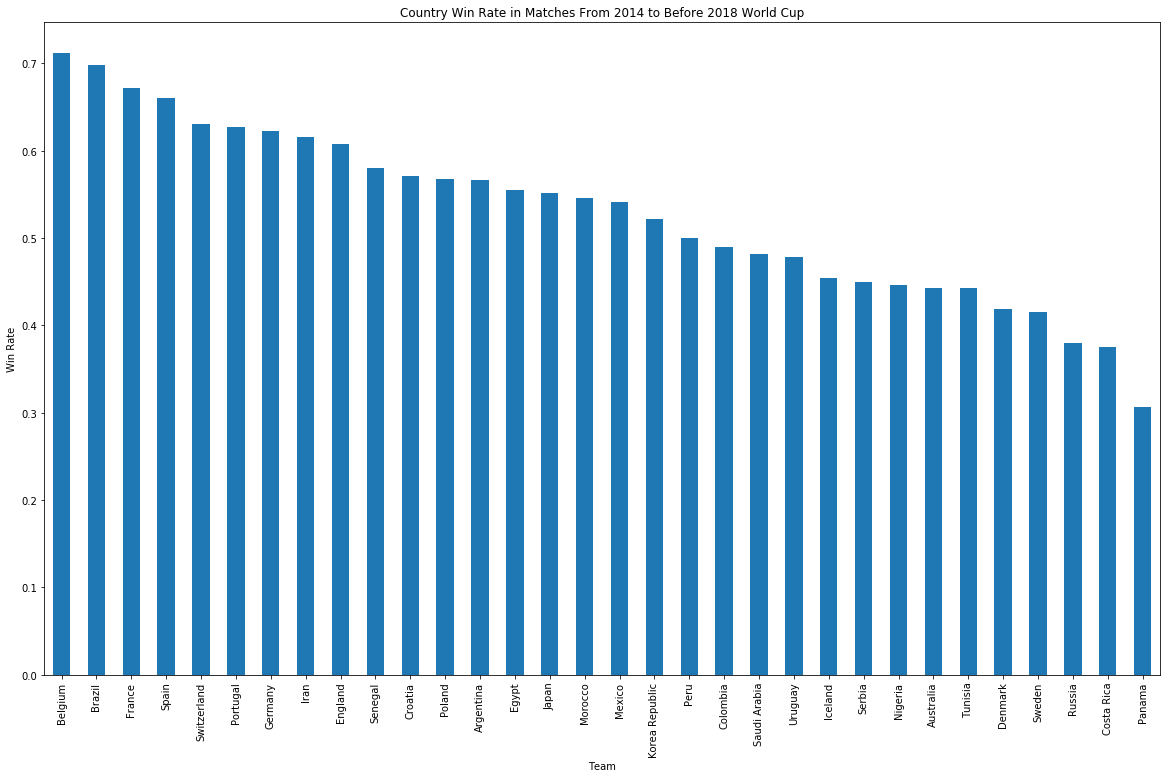

In [11]:
worldcup_team_win_count.plot.bar('Team', 'Win Rate', figsize = (20, 12))
plt.ylabel('Win Rate')
plt.title('Country Win Rate in Matches From 2014 to Before 2018 World Cup', )
plt.xticks(rotation=90)
plt.legend().set_visible(False)
plt.savefig('figs/winrate.png', bbox_inches='tight');

In [12]:
worldcup_team_win_count

,Team,Number of Wins,Number of Games,Win Rate
22,Belgium,37,52,0.711538
31,Brazil,37,53,0.698113
76,France,39,58,0.672414
204,Spain,33,50,0.660000
214,Switzerland,29,46,0.630435
179,Portugal,37,59,0.627119
81,Germany,38,61,0.622951
103,Iran,32,52,0.615385
67,England,31,51,0.607843
190,Senegal,29,50,0.580000


In [13]:
#https://gitlab.com/djh_or/2018-world-cup-stats/blob/master/world_cup_2018_stats.csv
world_cup_results = pd.read_csv("data/world_cup_2018_stats.csv")
world_cup_results.head()

,Game,Group,Team,Opponent,Home/Away,Score,WDL,Pens?,Goals For,Goals Against,...,Passes Completed,Distance Covered km,Balls recovered,Tackles,Blocks,Clearances,Yellow cards,Red Cards,Second Yellow Card leading to Red Card,Fouls Committed
0,1,A,Russia,Saudi Arabia,home,5-0,W,NaN,5,0,...,240,118,53,9,3,19,1,0,0,22
1,1,A,Saudi Arabia,Russia,away,5-0,L,NaN,0,5,...,442,105,48,16,3,31,1,0,0,10
2,2,A,Egypt,Uruguay,home,0-1,L,NaN,0,1,...,308,112,57,12,4,32,2,0,0,12
3,2,A,Uruguay,Egypt,away,0-1,W,NaN,1,0,...,508,111,54,8,2,22,0,0,0,6
4,3,B,Morocco,IR Iran,home,0-1,L,NaN,0,1,...,371,101,38,9,1,16,1,0,0,22


In [14]:
(set(worldcup_teams) - set(world_cup_results['Team'].unique())).union(\
    (set(world_cup_results['Team'].unique()) - set(worldcup_teams)))

{'IR Iran', 'Iran'}

In [15]:
world_cup_results['Team'] = world_cup_results['Team'].replace('IR Iran', 'Iran')
world_cup_results['Opponent'] = world_cup_results['Opponent'].replace('IR Iran', 'Iran')

In [16]:
(set(worldcup_teams) - set(world_cup_results['Team'].unique())).union(\
    (set(world_cup_results['Team'].unique()) - set(worldcup_teams)))

set()

In [17]:
test = world_cup_results[world_cup_results.index % 2 == 0].reset_index(drop = True)
test = test[['Team', 'Opponent', 'WDL']]
test.loc[test['WDL'] == 'L', 'WDL'] = 0
test.loc[test['WDL'] == 'W', 'WDL'] = 1
test.loc[test['WDL'] == 'D', 'WDL'] = 2
test.columns = ['home_team', 'away_team', 'home_win']
test.head()

,home_team,away_team,home_win
0,Russia,Saudi Arabia,1
1,Egypt,Uruguay,0
2,Morocco,Iran,0
3,Portugal,Spain,2
4,France,Australia,1


In [18]:
#https://www.kaggle.com/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
rankings = pd.read_csv('data/fifa_ranking.csv')
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
ranking_earliest_date = earliest_date
#get one year before earliest date 
ranking_earliest_date = str(int(ranking_earliest_date[:4]) - 1) + earliest_date[4:]
rankings_after = rankings[rankings['rank_date'] > pd.to_datetime(ranking_earliest_date)]

In [19]:
def get_latest_ranking_date(match_date, rankings_dates):
    return rankings_dates[match_date.to_datetime64() >  rankings_dates].max()

In [20]:
rankings_dates_after = rankings_after.rank_date.unique()
int_results_after['latest_ranking_date'] = int_results_after['date'].apply(\
                                        get_latest_ranking_date, args = [rankings_dates_after])
test['latest_ranking_date'] = get_latest_ranking_date(pd.to_datetime('2018-6-14'), rankings_dates_after)

In [21]:
int_results_after.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,Winner,latest_ranking_date
0,2014-01-04,Bahrain,Jordan,0,1,WAFF Championship,Doha,Qatar,True,0,Jordan,2013-12-19
1,2014-01-04,Namibia,Ghana,0,1,Friendly,Windhoek,Namibia,False,0,Ghana,2013-12-19
2,2014-01-04,Nigeria,Ethiopia,2,1,Friendly,Abuja,Nigeria,False,1,Nigeria,2013-12-19
3,2014-01-04,Qatar,Kuwait,3,0,WAFF Championship,Doha,Qatar,False,1,Qatar,2013-12-19
4,2014-01-07,Bahrain,Kuwait,0,0,WAFF Championship,Doha,Qatar,True,2,Tie,2013-12-19


In [22]:
set(int_results_after.Winner.unique()) - set(rankings_after.country_full)

{'Abkhazia',
 'Alderney',
 'Arameans Suryoye',
 'Artsakh',
 'Barawa',
 'Bonaire',
 'Bosnia-Herzegovina',
 'Brunei',
 'Burma',
 'Cape Verde',
 'Cascadia',
 'China',
 'County of Nice',
 'East Timor',
 'Ellan Vannin',
 'Falkland Islands',
 'Felvidék',
 'French Guyana',
 'Gotland',
 'Greenland',
 'Guadeloupe',
 'Guersney',
 'Hitra',
 'Iran',
 'Iraqi Kurdistan',
 'Ireland',
 'Isle of Man',
 'Isle of Wight',
 'Ivory Coast',
 'Jersey',
 'Kabylia',
 'Kyrgyzstan',
 'Kárpátalja',
 'Macedonia',
 'Martinique',
 'Matabeleland',
 'Menorca',
 'Northern Cyprus',
 'Northern Mariana Islands',
 'Occitania',
 'Orkney',
 'Padania',
 'Panjab',
 'Romani people',
 'Saare County',
 'Shetland',
 'Sint Maarten',
 'Somaliland',
 'South Ossetia',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Martin',
 'St. Vincent and the Grenadines',
 'Székely Land',
 'Sápmi',
 'São Tomé and Príncipe',
 'Taiwan',
 'Tamil Eelam',
 'Tie',
 'Tuvalu',
 'United Koreans in Japan',
 'Virgin Islands',
 'Western Armenia',
 'Western Isles',


In [23]:
set(rankings_after.country_full) - set(int_results_after.Winner.unique())

{'Anguilla',
 'Bahamas',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cape Verde Islands',
 'Cayman Islands',
 'China PR',
 'Chinese Taipei',
 "Côte d'Ivoire",
 'Eritrea',
 'FYR Macedonia',
 'IR Iran',
 'Kyrgyz Republic',
 'Myanmar',
 'Netherlands Antilles',
 'Republic of Ireland',
 'San Marino',
 'Somalia',
 'St Kitts and Nevis',
 'St Lucia',
 'St Vincent and the Grenadines',
 'São Tomé e Príncipe',
 'Timor-Leste',
 'Tonga',
 'US Virgin Islands'}

In [24]:
country_mapping = {
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
    'Cape Verde Islands': 'Cape Verde',
    #We have no political intentions with this assignment.
    'China PR': 'China',
    'Chinese Taipei': 'Taiwan',
    "Côte d'Ivoire'": 'Ivory Coast',
    'FYR Macedonia': 'Macedonia',
    'IR Iran' : 'Iran',
    'Kyrgyz Republic' : 'Kyrgyzstan',
    'Myanmar': 'Burma',
    'Republic of Ireland': 'Ireland',
    'St Kitts and Nevis': 'St. Kitts and Nevis',
    'St Lucia': 'St. Lucia',
    'St Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'São Tomé e Príncipe': 'São Tomé and Príncipe',
    'Timor-Leste': 'East Timor',
    #no clue which virgin islands
#     'US Virgin Islands': 'Virgin Islands'
}


In [25]:
def map_countries(rankings_country, country_mapping):
    if rankings_country in country_mapping.keys():
        return country_mapping[rankings_country]
    return rankings_country

In [26]:
rankings_after['country_mapped'] = rankings_after['country_full'].apply(map_countries,\
                                                                                     args = [country_mapping])

/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
set(rankings_after.country_mapped) - set(int_results_after.Winner.unique())

{'Anguilla',
 'Bahamas',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cayman Islands',
 "Côte d'Ivoire",
 'Eritrea',
 'Netherlands Antilles',
 'San Marino',
 'Somalia',
 'Tonga',
 'US Virgin Islands'}

In [28]:
int_results_after.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_win', 'Winner',
       'latest_ranking_date'],
      dtype='object')

In [29]:
home_rankings_after = rankings_after.copy()
home_rankings_after.columns = ['home_' + column for column in home_rankings_after.columns]
results_df = int_results_after.merge(home_rankings_after, left_on = ['home_team', 'latest_ranking_date'],\
                            right_on = ['home_country_mapped', 'home_rank_date'])
away_rankings_after = rankings_after.copy()
away_rankings_after.columns = ['away_' + column for column in away_rankings_after.columns]
results_df = results_df.merge(away_rankings_after, left_on = ['away_team', 'latest_ranking_date'],\
                            right_on = ['away_country_mapped', 'away_rank_date'])
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,away_confederation,away_rank_date,away_country_mapped
0,2014-01-04,Bahrain,Jordan,0,1,WAFF Championship,Doha,Qatar,True,0,...,343.17,152.19,76.10,266.37,79.91,182.25,36.45,AFC,2013-12-19,Jordan
1,2014-01-07,Qatar,Jordan,2,0,WAFF Championship,Doha,Qatar,False,1,...,343.17,152.19,76.10,266.37,79.91,182.25,36.45,AFC,2013-12-19,Jordan
2,2014-01-07,Bahrain,Kuwait,0,0,WAFF Championship,Doha,Qatar,True,2,...,172.78,95.79,47.90,187.73,56.32,189.73,37.95,AFC,2013-12-19,Kuwait
3,2014-01-04,Qatar,Kuwait,3,0,WAFF Championship,Doha,Qatar,False,1,...,172.78,95.79,47.90,187.73,56.32,189.73,37.95,AFC,2013-12-19,Kuwait
4,2014-01-04,Namibia,Ghana,0,1,Friendly,Windhoek,Namibia,False,0,...,453.96,398.69,199.35,288.00,86.40,544.92,108.98,CAF,2013-12-19,Ghana


In [30]:
test_df = test.merge(home_rankings_after, left_on = ['home_team', 'latest_ranking_date'],\
                            right_on = ['home_country_mapped', 'home_rank_date'])
test_df = test_df.merge(away_rankings_after, left_on = ['away_team', 'latest_ranking_date'],\
                            right_on = ['away_country_mapped', 'away_rank_date'])
test_df.head()

,home_team,away_team,home_win,latest_ranking_date,home_rank,home_country_full,home_country_abrv,home_total_points,home_previous_points,home_rank_change,...,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,away_confederation,away_rank_date,away_country_mapped
0,Russia,Saudi Arabia,1,2018-06-07,70,Russia,RUS,456.53,493,-4,...,143.89,360.20,180.10,380.91,114.27,135.09,27.02,AFC,2018-06-07,Saudi Arabia
1,Uruguay,Saudi Arabia,1,2018-06-07,14,Uruguay,URU,1018.41,976,3,...,143.89,360.20,180.10,380.91,114.27,135.09,27.02,AFC,2018-06-07,Saudi Arabia
2,Russia,Egypt,1,2018-06-07,70,Russia,RUS,456.53,493,-4,...,208.27,582.07,291.04,331.62,99.48,253.18,50.64,CAF,2018-06-07,Egypt
3,Saudi Arabia,Egypt,1,2018-06-07,67,Saudi Arabia,KSA,465.28,462,0,...,208.27,582.07,291.04,331.62,99.48,253.18,50.64,CAF,2018-06-07,Egypt
4,Russia,Croatia,0,2018-06-07,70,Russia,RUS,456.53,493,-4,...,397.75,672.78,336.39,335.96,100.79,551.26,110.25,UEFA,2018-06-07,Croatia


In [31]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_win', 'Winner',
       'latest_ranking_date', 'home_rank', 'home_country_full',
       'home_country_abrv', 'home_total_points', 'home_previous_points',
       'home_rank_change', 'home_cur_year_avg', 'home_cur_year_avg_weighted',
       'home_last_year_avg', 'home_last_year_avg_weighted',
       'home_two_year_ago_avg', 'home_two_year_ago_weighted',
       'home_three_year_ago_avg', 'home_three_year_ago_weighted',
       'home_confederation', 'home_rank_date', 'home_country_mapped',
       'away_rank', 'away_country_full', 'away_country_abrv',
       'away_total_points', 'away_previous_points', 'away_rank_change',
       'away_cur_year_avg', 'away_cur_year_avg_weighted', 'away_last_year_avg',
       'away_last_year_avg_weighted', 'away_two_year_ago_avg',
       'away_two_year_ago_weighted', 'away_three_year_ago_avg',
       'away_three_year_ago_weighted', 'away

In [32]:
final_results_df = results_df[['home_win', 'home_rank', 'away_rank',\
            'home_cur_year_avg_weighted', 'home_total_points','away_cur_year_avg_weighted',
            'away_total_points', 'home_last_year_avg', 'away_last_year_avg', 'home_two_year_ago_avg',
            'away_two_year_ago_avg', 'home_confederation']]
# final_results_df['rank_diff'] = final_results_df['home_rank'] - final_results_df['away_rank']

final_test_df = test_df[['home_win', 'home_rank', 'away_rank',\
            'home_cur_year_avg_weighted', 'home_total_points','away_cur_year_avg_weighted',
            'away_total_points', 'home_last_year_avg', 'away_last_year_avg', 'home_two_year_ago_avg',
            'away_two_year_ago_avg', 'home_confederation']]

In [33]:
# tournament_dummies = pd.get_dummies(final_results_df['home_confederation'], drop_first = True)
# final_results_df[tournament_dummies.columns] = tournament_dummies
# final_results_df = final_results_df.drop(['home_confederation'], axis = 1)





dataset = pd.concat(objs=[final_results_df.copy(), final_test_df.copy()], axis=0)
dataset['home_win'] = dataset['home_win'].astype('int')
tournament_dummies = pd.get_dummies(dataset['home_confederation'], drop_first = True)
dataset[tournament_dummies.columns] = tournament_dummies
dataset = dataset.drop(['home_confederation'], axis = 1)
train_df = dataset[:len(final_results_df)]
test_df = dataset[len(final_results_df):]


In [34]:
train_df.head()

,home_win,home_rank,away_rank,home_cur_year_avg_weighted,home_total_points,away_cur_year_avg_weighted,away_total_points,home_last_year_avg,away_last_year_avg,home_two_year_ago_avg,away_two_year_ago_avg,CAF,CONCACAF,CONMEBOL,OFC,UEFA
0,0,110,65,174.70,291.66,343.17,535.63,102.82,152.19,163.78,266.37,0,0,0,0,0
1,1,103,65,140.16,324.85,343.17,535.63,183.57,152.19,225.79,266.37,0,0,0,0,0
2,2,110,105,174.70,291.66,172.78,314.94,102.82,95.79,163.78,187.73,0,0,0,0,0
3,1,103,105,140.16,324.85,172.78,314.94,183.57,95.79,225.79,187.73,0,0,0,0,0
4,0,125,24,97.78,237.21,453.96,848.68,149.59,398.69,192.78,288.00,1,0,0,0,0


In [35]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [36]:
train, validation = train_test_split(train_df, test_size = 0.2)
y_train = train['home_win'].as_matrix()
X_train = train.drop(['home_win'], axis = 1).as_matrix()
y_validation = validation['home_win'].as_matrix()
X_validation = validation.drop(['home_win'], axis = 1).as_matrix()


In [37]:
lr_model = LogisticRegressionCV(solver = 'lbfgs', max_iter = 5000, cv = 5, multi_class='multinomial').fit(X_train, y_train)

In [38]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_validation, y_validation))

0.5581636175353815
0.5558620689655173


In [39]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [40]:
print(lda_model.score(X_train, y_train))
print(lda_model.score(X_validation, y_validation))

0.5595443562305834
0.5544827586206896


In [41]:
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

In [42]:
print(qda_model.score(X_train, y_train))
print(qda_model.score(X_validation, y_validation))

0.5581636175353815
0.5241379310344828


In [43]:
rf_model = RandomForestClassifier(min_samples_leaf = 20, n_estimators=100).fit(X_train, y_train)

In [44]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_validation, y_validation))

0.6330686917500863
0.5572413793103448


In [45]:
len(y_train)

2897

In [46]:
from sklearn.metrics import accuracy_score

print(accuracy_score(np.ones(len(y_train)), y_train))
print(accuracy_score(np.ones(len(y_validation)), y_validation))

0.46945115636865725
0.496551724137931


In [47]:
y_test = test_df['home_win'].as_matrix()
X_test = test_df.drop(['home_win'], axis = 1).as_matrix()

In [48]:
lr_model.score(X_test, y_test)

0.5625

In [49]:
lda_model.score(X_test, y_test)

0.546875

In [50]:
qda_model.score(X_test, y_test)

0.515625

In [51]:
rf_model.score(X_test, y_test)

0.5

In [52]:
print(accuracy_score(np.ones(len(y_test)), y_test))

0.421875
